In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from scipy.stats import kruskal
import scikit_posthocs as sp
from matplotlib.colors import ListedColormap
import seaborn as sns

In [7]:
pal = sns.cubehelix_palette(16, rot=0.4) #cubehelix_palette
# pal=sns.light_palette((210, 90, 60), input="husl")
# sns.palplot(pal)
kkcolors = ['white'] + [pal[i] for i in [0, 5,4, 2]]
# sns.palplot(kkcolors)

In [16]:
freq = 20
nn_p = 5
nn_w = 5
nn_tw = 1
m='mof'

In [17]:
df = get_data(m,krus=True)
df = df[(df['nnw']==str(nn_w))&(df['nntw']==str(nn_tw))&(df['nnp']==str(nn_p))|(df['isnn']==False)] 

In [18]:
def get_kk_data(m, freq, df):
    df = df.query(f'freq == {freq}')
    labels = df['method'].unique()
    labels = labels_order
    pcs = {}
    for exp,df_exp in df.groupby('experiment'):
        pcs[exp] = {}
        for fun,df_fun in df_exp.groupby('function'):
            values = [df_fun.query(f'method=={m!r}').mof for m in labels]# !r puts "" for m!!
            x = np.array(values)
#             stat,p = kruskal(*values)
            pc = sp.posthoc_conover(x, p_adjust='holm', val_col='values', group_col='groups')
            pc.columns = labels
            pc.index = labels
            pcs[exp][fun] = pc

    return pcs,labels

def plot_heatmap(pc):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    ax,cbar = sp.sign_plot(pc, **heatmap_args)
    ax.set_xticklabels(labels, rotation='vertical')
    ax.set_yticklabels(labels, rotation='horizontal')
    plt.tight_layout()

def plot_one(m, freq, legend=False):
    pcs,labels = get_kk_data(m, freq, df)
    fig,all_axs = plt.subplots(3, 4, figsize=(12,9))#, sharex=True, sharey=True)#8,6

    for i,exp in enumerate(['exp1','exp2','exp3','exp4']):
        exp_pc = pcs[exp]
        heatmap_args = {'linewidths': 0.05, 'linecolor': '0.5', 'clip_on': False, 'square': True,
                        'cbar_ax_bbox': [0.91, 0.13, 0.04, 0.1]}#[1.0, 0.6, 0.04, 0.3] 0.92, 0.57, 0.04, 0.3
        sp.sign_plot(exp_pc['sphere'], cmap=kkcolors, ax=all_axs[0][i], **heatmap_args)
#         sp.sign_plot(exp_pc['sphere'], ax=all_axs[0][i], **heatmap_args)
        sp.sign_plot(exp_pc['rosenbrock'], cmap=kkcolors, ax=all_axs[1][i], **heatmap_args)
        _,cbar = sp.sign_plot(exp_pc['rastrigin'], cmap=kkcolors, ax=all_axs[2][i], **heatmap_args)
        if legend==False: cbar.remove()

    columns = exp_pc['sphere'].columns.tolist()

    for i,ax in enumerate(all_axs[0]): ax.set_title(f'exp{i+1}')    
    for ax in all_axs.flatten():
        ax.set_xticks(np.arange(len(labels))+0.5)
        ax.set_xticklabels(labels, fontsize=8)
        ax.set_yticks(np.arange(len(labels))+0.5)
#         ax.set_yticklabels(labels)
        ax.set_yticklabels(labels, fontsize=8)

    for ax in all_axs[:-1].flatten(): ax.set_xticks([])
    for axs in all_axs:
        for ax in axs[1:]: ax.set_yticks([])
        
    for ax,t in zip([o[0] for o in all_axs],['Sphere','Rosenbrock','Rastrigin']):
        ax.set_ylabel(t)
        
#     plt.tight_layout()
    return fig,all_axs

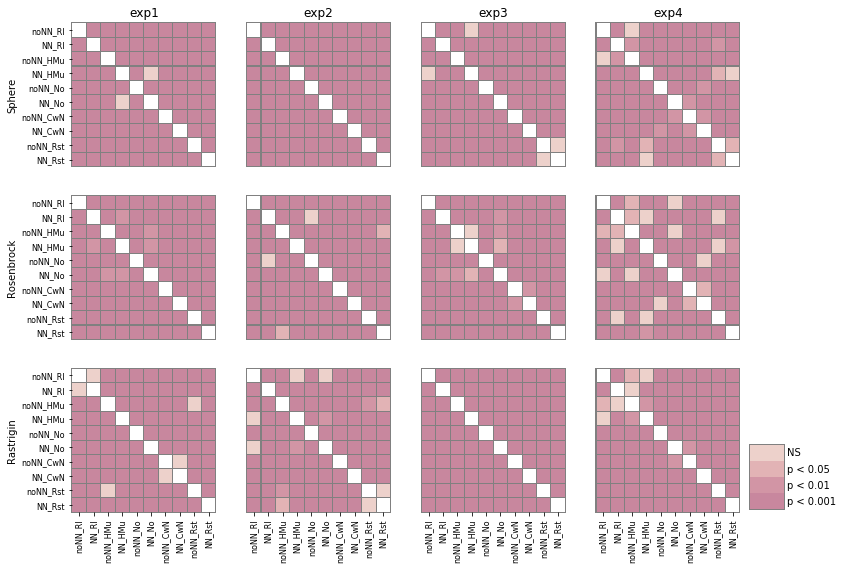

In [19]:
#for freq,legend in zip([0.5,1,4],[False,True,False]):
# for freq,legend in zip([40],[True]):
fig,ax = plot_one(m,freq,legend=True)
plt.show()
freq_lbl = f'{freq*10:02.0f}' if freq<1 else freq
fig.savefig(PATH_RESULTS/f'kruskal{freq_lbl}.eps', format='eps', dpi=600, bbox_inches='tight')

In [ ]:
# # pal = sns.diverging_palette(145, 280, s=85, l=25, n=9)
# # pal = sns.diverging_palette(315, 280, s=85, l=25, n=9)
# pal = sns.color_palette("Blues", 10)
# sns.palplot(pal)
# kkcolors = ['white'] + [pal[i] for i in [9, 3, 2, 0]]
# sns.palplot(kkcolors)

In [ ]:
# # pal = sns.diverging_palette(145, 280, s=85, l=25, n=9)
# # pal = sns.diverging_palette(315, 280, s=85, l=25, n=9)
# pal = sns.color_palette("Blues", 10)
# sns.palplot(pal)
# kkcolors = ['white'] + [pal[i] for i in [9, 3, 2, 0]]
# sns.palplot(kkcolors)

In [ ]:
pcs,labels= get_kk_data(m, freq, df)

In [ ]:
pcs['exp1']['sphere']